In [68]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns
import plotly.figure_factory as ff

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/movies.csv')

## Explore the data

In [4]:
display(df.head())
display(df.shape)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

(7668, 15)

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# get total number of missing values in each column

df.isna().sum().sort_values(ascending = False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [7]:
# check for missing data (percentage %)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [9]:
# drop rows with missing data

for col in df.columns:
    df.dropna(subset = [col], inplace=True)

In [10]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace=True)

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [11]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
# check for duplicates

df.duplicated().sum()

0

In [13]:
# df['company'].drop_duplicates().sort_values(ascending = False)

In [14]:
# change data type of columns

for col in ['votes', 'budget', 'gross']:
    df[col] = df[col].astype('int64')
    
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [15]:
# sort the dataframe by 'gross'
df.sort_values(by = 'gross', ascending = False)

name     rating      genre  \
3731                                             Avatar      PG-13     Action   
5302                                  Avengers: Endgame      PG-13     Action   
1795                                            Titanic      PG-13      Drama   
4730         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
5158                             Avengers: Infinity War      PG-13     Action   
5334                                      The Lion King         PG  Animation   
4720                                     Jurassic World      PG-13     Action   
4224                                       The Avengers      PG-13     Action   
4713                                          Furious 7      PG-13     Action   
5346                                          Frozen II         PG  Animation   
4711                            Avengers: Age of Ultron      PG-13     Action   
5161                                      Black Panther      PG-13     Action   
4066       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
5055            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
5185                     Jurassic World: Fallen Kingdom      PG-13     Action   
4404                                             Frozen         PG  Animation   
5052                               Beauty and the Beast         PG     Family   
5195                                      Incredibles 2         PG  Animation   
5035                            The Fate of the Furious      PG-13     Action   
4387                                         Iron Man 3      PG-13     Action   
4753                                            Minions         PG  Animation   
4869                         Captain America: Civil War      PG-13     Action   
5164                                            Aquaman      PG-13     Action   
2753      The Lord of the Rings: The Return of the King      PG-13     Action   
5314                          Spider-Man: Far from Home      PG-13     Action   
5312                                     Captain Marvel      PG-13     Action   
4098                     Transformers: Dark of the Moon      PG-13     Action   
4240                                            Skyfall      PG-13     Action   
4597                    Transformers: Age of Extinction      PG-13     Action   
1387                                      The Lion King          G  Animation   
4228                              The Dark Knight Rises      PG-13     Action   
5319      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
5306                                              Joker          R      Crime   
5340                                        Toy Story 4          G  Animation   
3940                                        Toy Story 3          G  Animation   
3247         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
4890                       Rogue One: A Star Wars Story      PG-13     Action   
5335                                            Aladdin         PG  Adventure   
4080        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
5109                                    Despicable Me 3         PG  Animation   
1244                                      Jurassic Park      PG-13     Action   
4924                                       Finding Dory         PG  Animation   
2097          Star Wars: Episode I - The Phantom Menace         PG     Action   
3923                                Alice in Wonderland         PG  Adventure   
4885                                           Zootopia         PG  Animation   
4226                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
2414              Harry Potter and the Sorcerer's Stone         PG  Adventure   
3558                                    The Dark Knight      PG-13     Action   
4451                                    Despicable Me 2         PG  Animation   
4

### Check correlation between features, and check if my hypothesis are correct.  

In [16]:
# my guesses:

# budget will has a high correlation on gross
# company will have a high correlation on gross

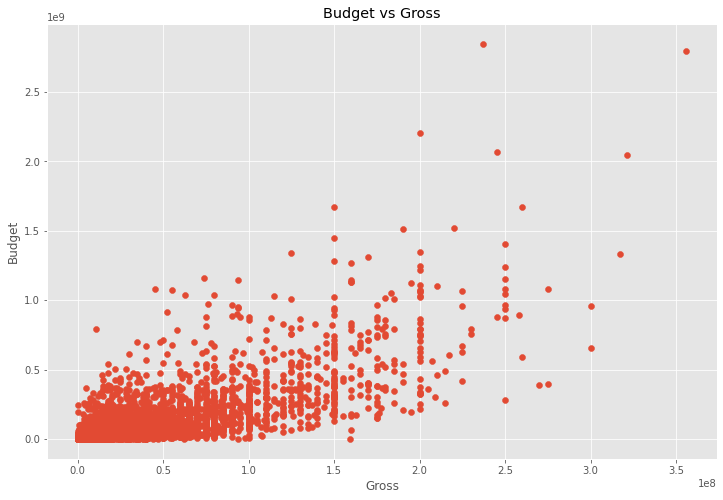

In [17]:
# budget vs gross.

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

# visually it seems that the budget and gross are correlated

<AxesSubplot:xlabel='budget', ylabel='gross'>

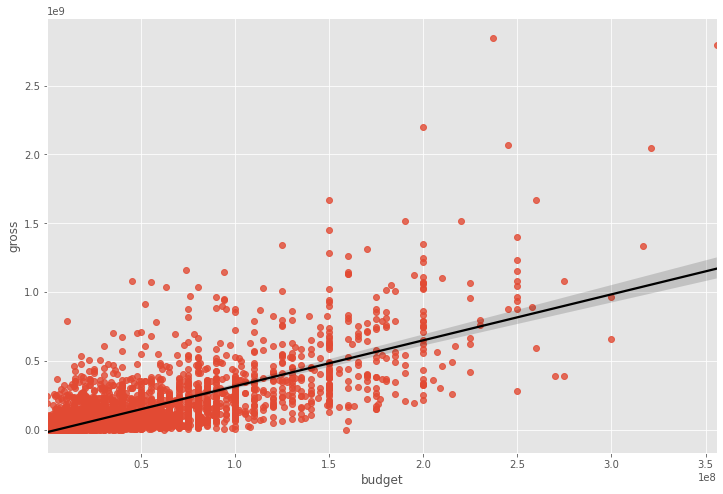

In [18]:
# regression plot using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, line_kws = {'color': 'black'})

# looks like budget and gross have a positive correlation

In [19]:
# correlation for the numerical feature in the dataframe using the corr (pearson) method 

df.corr()

# high correlation between budget and gross 

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

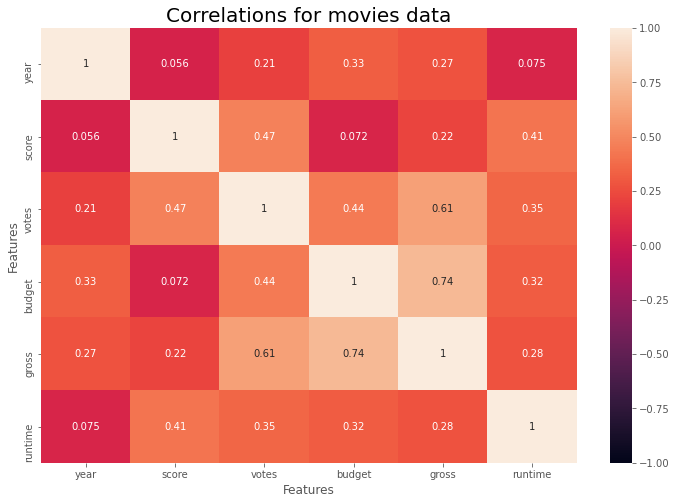

In [20]:
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Correlations for movies data', size=20)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

In [21]:
# Converting the categorical features into numerical

df_numerical = df.copy()
for col in df_numerical.columns:
    if df_numerical[col].dtype == 'object':
        df_numerical[col] = df_numerical[col].astype('category').cat.codes
        
df_numerical.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000      1795    2832   
1  3929       6      1  1980      1127    5.8    65000      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000       757    1818   
3   204       4      4  1980      1127    7.7   221000       889    1413   
4   732       6      4  1980      1170    7.3   108000       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

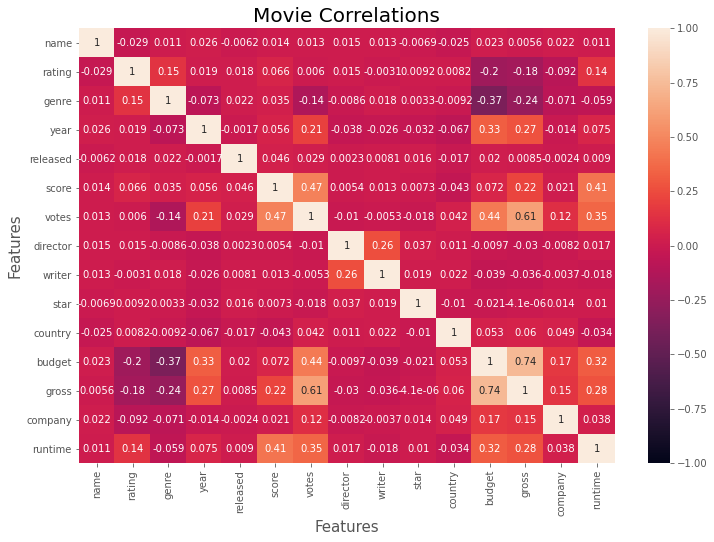

In [22]:
# correlation for all features

corr_all = df_numerical.corr()
sns.heatmap(corr_all, annot=True, vmin=-1)
plt.title('Movie Correlations', size=20)
plt.xlabel('Features', size=15)
plt.ylabel('Features', size=15)
plt.show()

In [23]:
# we will get the same results as in the above heatmap, but with easier to understand visualtization  

corr_all

name    rating     genre      year  released     score  \
name      1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating   -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre     0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year      0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score     0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes     0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director  0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer    0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star     -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget    0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross     0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company   0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime   0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   

             votes  director    writer      star   country    budget  \
name      0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating    0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre    -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year      0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score     0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes     1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer   -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star     -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country   0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget    0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross     0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company   0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime   0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   

             gross   company   runtime  
name      0.005639  0.021697  0.010850  
rating   -0.181906 -0.092357  0.140792  
genre    -0.244101 -0.071334 -0.059237  
year      0.274321 -0.014333  0.075077  
released  0.008501 -0.002407  0.008975  
score     0.222556  0.020656  0.414068  
votes     0.614751  0.118470  0.352303  
director -0.029560 -0.008223  0.017433  
writer   -0.035885 -0.003697 -0.017561  
star     -0.000004  0.014082  0.010108  
country   0.060078  0.048569 -0.034477  
budget    0.740247  0.170235  0.318695  
gross     1.000000  0.149553  0.275796  
company   0.149553  1.000000  0.037585  
runtime   0.275796  0.037585  1.000000

In [24]:
# view correlation matrix of a single feature with all other features in the dataframe

corr_pairs = corr_all.unstack()       
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [25]:
# sort the correlation matrix

sorted_corr = corr_pairs.sort_values() #Sort correlation martix by correlation pairs (e.g. gross & company, gross & budget)
sorted_corr

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

##### company is not among the highest values, this means my hypothesis that company will have a high correlation on gross was wrong, but votes does.

In [26]:
highest_corr = sorted_corr[sorted_corr > 0.5] # return correlations greater than 0.5
highest_corr[0:4].sort_values(ascending=False) # return highest values where correlation is not 1.0

gross   budget    0.740247
budget  gross     0.740247
votes   gross     0.614751
gross   votes     0.614751
dtype: float64

## visualization

In [27]:
df_sorted = df.sort_values(by = 'gross', ascending = False)

In [28]:
#### visualize the 5 movies with the highest gross score vs budget

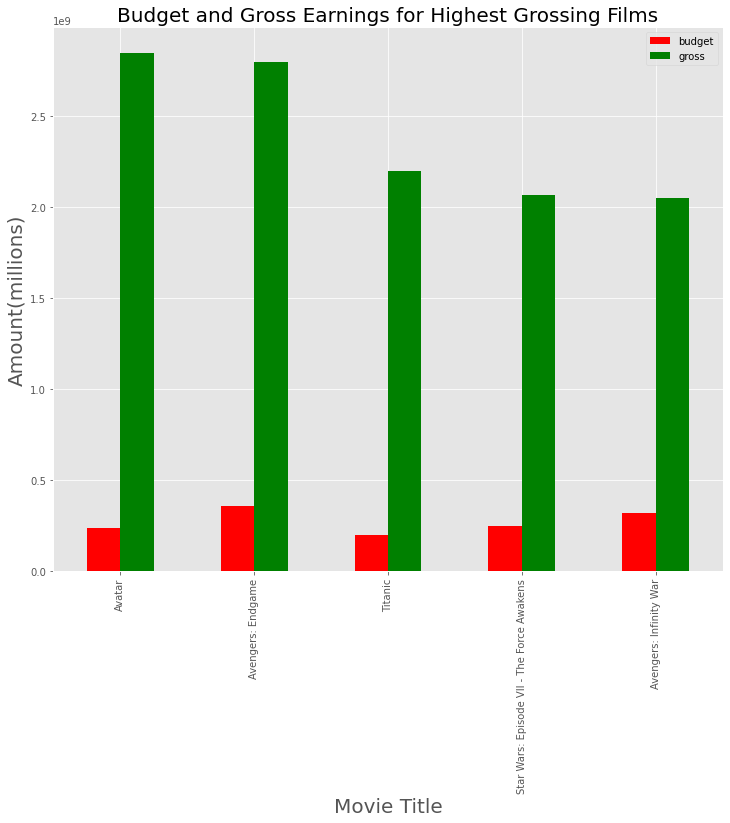

In [29]:
df_sorted[0:5].plot(kind='bar', x='name', y=['budget','gross'], color={'budget':'red', 'gross':'green'}, figsize=(12,10))
plt.title('Budget and Gross Earnings for Highest Grossing Films', size=20)
plt.xlabel('Movie Title', size=20)
plt.ylabel('Amount(Billions)', size=20)
plt.show()

In [30]:
#### visualize budget vs gross by company

In [31]:
groupby_comp = df.groupby(['company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)
groupby_comp.head()

<ipython-input-31-4e62def6ddfd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupby_comp = df.groupby(['company'])['budget','gross'].sum().sort_values(by='gross',ascending=False)


budget        gross
company                                        
Warner Bros.           19503300000  54610959970
Universal Pictures     15989730001  51241105418
Columbia Pictures      15512107000  42356430218
Paramount Pictures     13723450000  40021704691
Twentieth Century Fox  11474600000  39542573303

In [32]:
top_company = groupby_comp.reset_index()

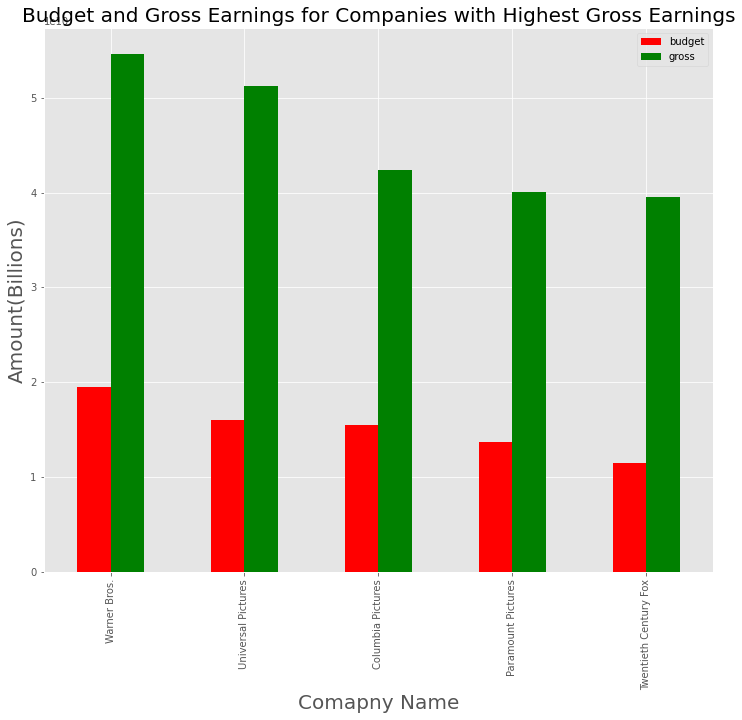

In [33]:
top_company[0:5].plot(kind='bar', x='company', y=['budget','gross'], color={'budget':'red', 'gross':'green'}, figsize=(12,10))
plt.title('Budget and Gross Earnings for Companies with Highest Gross Earnings', size=20)
plt.xlabel('Comapny Name', size=20)
plt.ylabel('Amount(Billions)', size=20)
plt.show()

In [34]:
# net gross by star

df['net'] = df['gross'] - df['budget']

top_star = df.groupby(['star'])['budget','net'].sum().sort_values(by='net',ascending=False).reset_index()
top_star.head()

<ipython-input-34-b3e1c5ce27fb>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_star = df.groupby(['star'])['budget','net'].sum().sort_values(by='net',ascending=False).reset_index()


star      budget         net
0  Robert Downey Jr.  2298000000  9557937746
1          Tom Hanks  2292000000  7607944903
2         Tom Cruise  2537300000  6903009875
3   Daniel Radcliffe  1123000000  5848268037
4         Will Smith  2290100000  5657179234

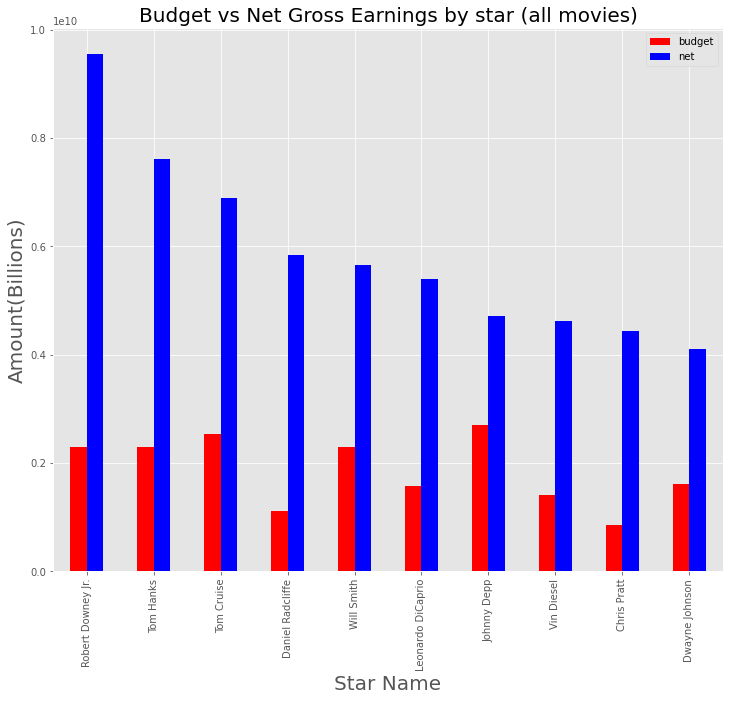

In [35]:
top_star[0:10].plot(kind='bar', x='star', y=['budget','net'], color={'budget':'red', 'net':'blue'}, figsize=(12,10))
plt.title('Budget vs Net Gross Earnings by star (all movies)', size=20)
plt.xlabel('Star Name', size=20)
plt.ylabel('Amount(Billions)', size=20)
plt.show()

#### visualize how many movies by company

In [36]:
company_movies_count = df['company'].value_counts()
company_movies_count = pd.DataFrame(company_movies_count) 

company_movies_count.head()

company
Universal Pictures         330
Columbia Pictures          302
Warner Bros.               298
Paramount Pictures         279
Twentieth Century Fox      209

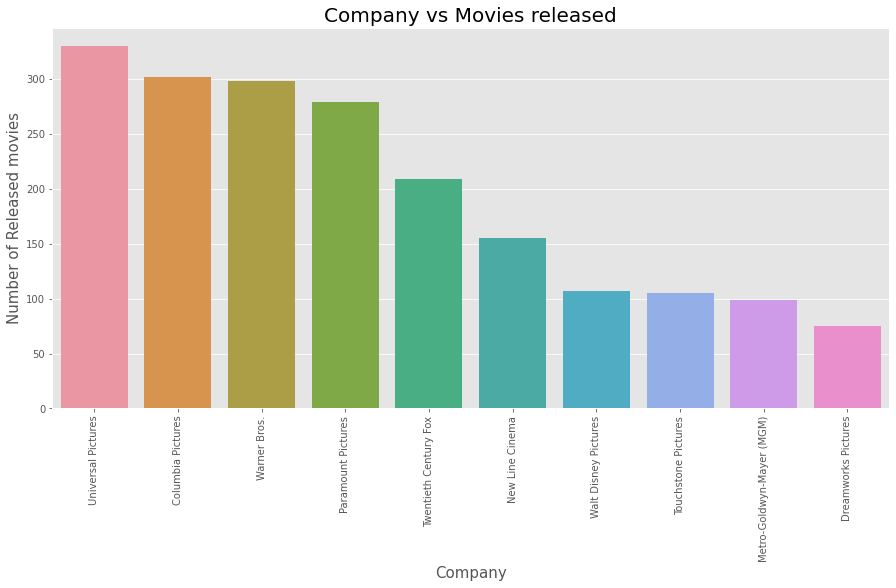

In [37]:
sns.barplot(x = company_movies_count[:10].index, y = company_movies_count['company'][:10])

labels = company_movies_count[:10].index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Company vs Movies released', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Number of Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '90')

plt.show()

In [38]:
gross_by_gener = df.groupby(['genre'], as_index=False)['gross'].sum().sort_values(by='gross', ascending=False)
gross_by_gener.reset_index()

gross_by_gener

genre         gross
0      Action  237752868767
4      Comedy   88514817620
2   Animation   77865909110
6       Drama   52098564769
1   Adventure   43578711908
5       Crime   20017662162
3   Biography   19093930296
9      Horror   14261055032
7      Family    2074332587
10    Mystery    2004091467
8     Fantasy    1635026609
13   Thriller     297416988
12     Sci-Fi     225660614
11    Romance     167876905
14    Western      20025886

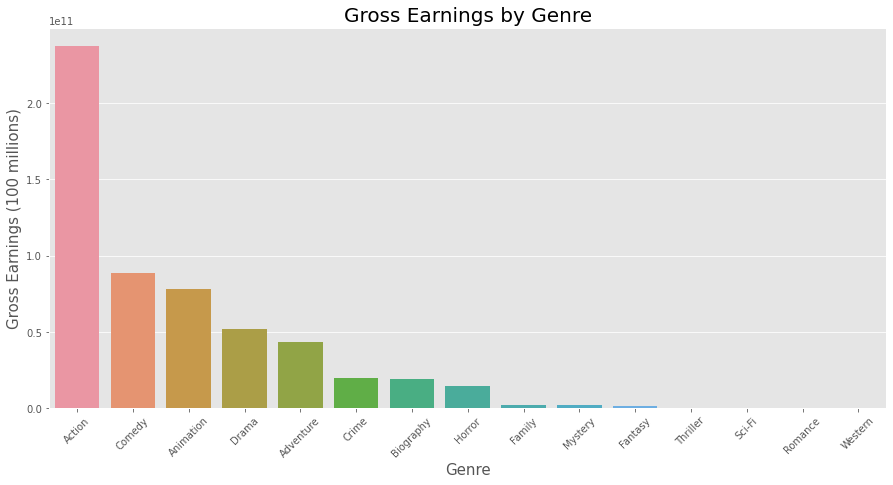

In [39]:
sns.barplot(x = gross_by_gener['genre'], y = gross_by_gener['gross'])

labels = gross_by_gener['genre'].tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Gross Earnings by Genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Gross Earnings (100 millions)', fontsize = 15)
plt.xticks(ticks = range(len(gross_by_gener)) , labels = labels, rotation = '45')

plt.show()

In [40]:
# sort out genre by movie counts
genre = df.groupby(['genre']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']

genre

genre  count
0      Comedy   1496
1      Action   1415
2       Drama    863
3       Crime    399
4   Adventure    327
5   Biography    311
6   Animation    277
7      Horror    251
8     Fantasy     41
9     Mystery     17
10   Thriller      7
11     Sci-Fi      6
12    Romance      5
13     Family      4
14    Western      2

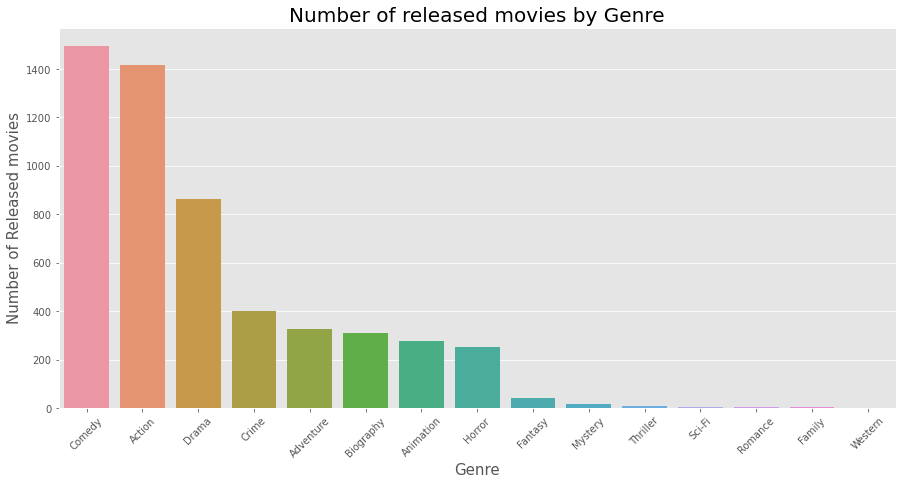

In [41]:
sns.barplot(x = genre['genre'], y = genre['count'])

labels = genre['genre'].tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Number of released movies by Genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Number of Released movies', fontsize = 15)
plt.xticks(ticks = range(len(genre)) , labels = labels, rotation = '45')

plt.show()

In [43]:
# each of the last 7 genres has less than 50 released movies, I will group them into a single value and call it others 

others = genre.loc[list(range(8, 8 + len(genre[8:])))]['count'].sum()
genre = genre.drop(list(range(8, 8 + len(genre[8:])))) # drop these values from the genre dataframe
genre.loc[8] = ['Others', others] # assign the new value

genre

genre  count
0     Comedy   1496
1     Action   1415
2      Drama    863
3      Crime    399
4  Adventure    327
5  Biography    311
6  Animation    277
7     Horror    251
8     Others     82

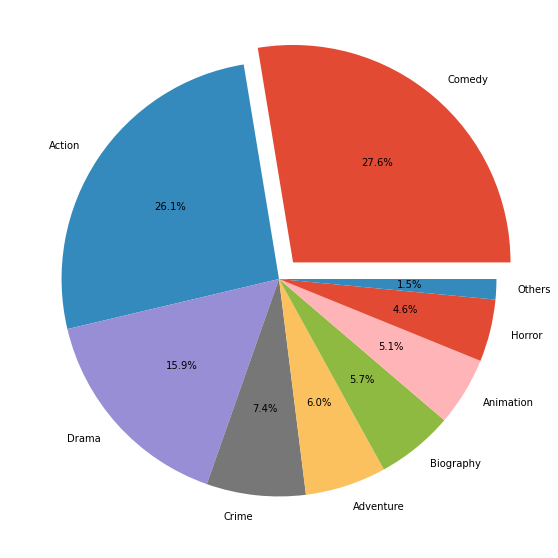

In [44]:
labels = genre['genre']
size = genre['count']
exp = [.1,0,0,0,0,0,0,0,0]
plt.pie(size, labels = labels, explode = exp, autopct='%1.1f%%')

plt.gcf().set_size_inches(10, 10)
plt.show()

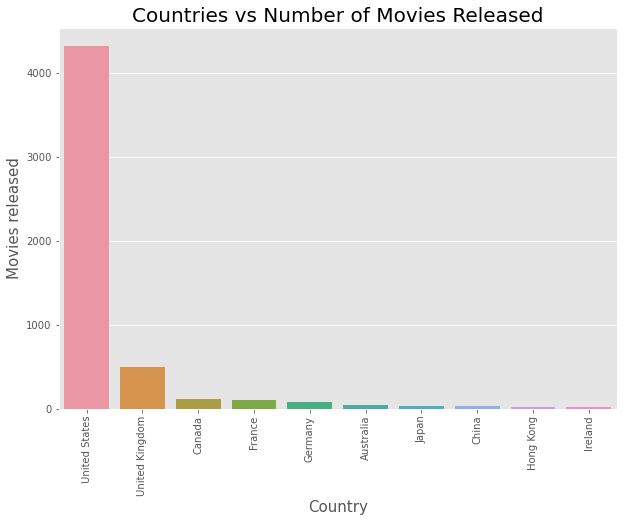

In [45]:
# top 10 countries vs movies released

top_countries = df['country'].value_counts().head(10).reset_index()

sns.barplot(x = top_countries.index, y = top_countries['country'])

plt.title('Countries vs Number of Movies Released', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.xticks(list(range(len(top_countries))), top_countries['index'], rotation = 90)
plt.gcf().set_size_inches(10, 7)

plt.show()

In [47]:
# top 10 rated movies

top_rated = df[df['score'] > 8.5].sort_values(by = 'score', ascending = False).head(10)
top_rated = top_rated[['name', 'score']].reset_index().drop(columns = 'index', axis = 1)
top_rated

name  score
0                           The Shawshank Redemption    9.3
1                                    The Dark Knight    9.0
2                                   Schindler's List    8.9
3                                       Pulp Fiction    8.9
4      The Lord of the Rings: The Return of the King    8.9
5                                         Fight Club    8.8
6                                          Inception    8.8
7                                       Forrest Gump    8.8
8  The Lord of the Rings: The Fellowship of the Ring    8.8
9     Star Wars: Episode V - The Empire Strikes Back    8.7

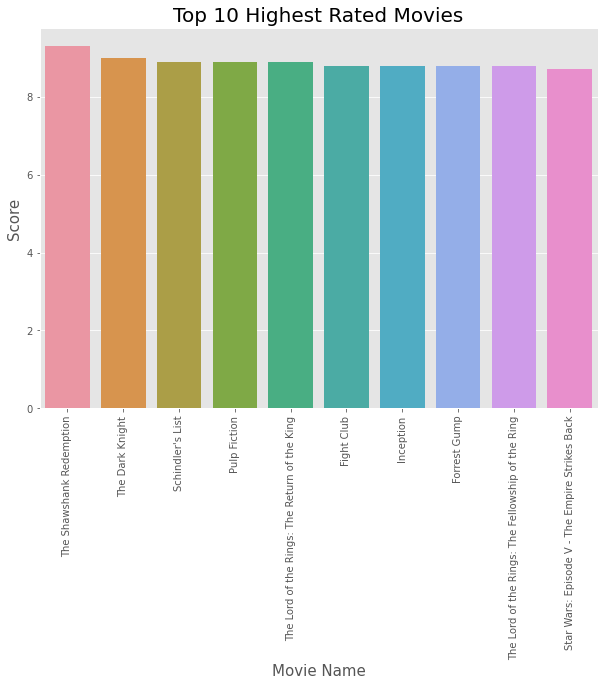

In [48]:
# top 10 highest rated movies

sns.barplot(x = top_rated.name, y = top_rated['score'])

plt.title('Top 10 Highest Rated Movies', fontsize = 20)
plt.xlabel('Movie Name', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

plt.xticks(list(range(len(top_rated))), top_rated['name'], rotation = 90)
plt.gcf().set_size_inches(10, 7)

plt.show()

In [51]:
# Top 10 used directors 

popular_directors = df.groupby(['director']).size().sort_values(ascending=False).reset_index().head(10)
popular_directors.columns = ['director', 'count']

popular_directors

director  count
0        Woody Allen     33
1     Clint Eastwood     31
2   Steven Spielberg     27
3         Ron Howard     23
4       Ridley Scott     23
5  Steven Soderbergh     23
6    Joel Schumacher     20
7         Tim Burton     19
8    Martin Scorsese     19
9     Barry Levinson     18

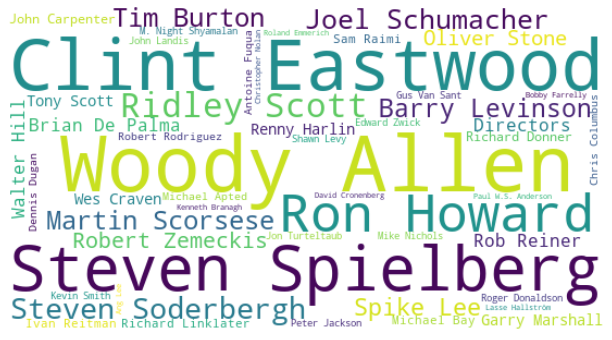

In [61]:
words = dict()
experience = df.groupby(['director']).size().sort_values(ascending=False).reset_index()
experience.columns = ['director', "frequency"]
for i in range(50):
    words[experience['director'][i]] = experience["frequency"][i]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white')
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [71]:
runtime_dist = df['runtime'].fillna(0.0).astype(float)
fig = ff.create_distplot([runtime_dist], ['Runtime'], bin_size=0.7, curve_type='normal', colors=['#AA381E'])
fig.update_layout(title_text='Runtime with normal distribution')
fig.show()